**@Majeed Shaikh**

# $$Linear Regression Algorithm$$

---

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import lux
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = 14,7
from pandas.plotting import scatter_matrix

In [9]:
data = pd.read_csv('E://Desktop//headbrain.csv')

In [11]:
data.head()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [12]:
data.tail()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [13]:
data

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [14]:
data.info()

<class 'lux.core.frame.LuxDataFrame'>
RangeIndex: 237 entries, 0 to 236
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Head Size(cm^3)      237 non-null    int64
 1   Brain Weight(grams)  237 non-null    int64
dtypes: int64(2)
memory usage: 3.8 KB


In [16]:
data.describe()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [17]:
data.isnull().sum()

Head Size(cm^3)        0
Brain Weight(grams)    0
dtype: int64


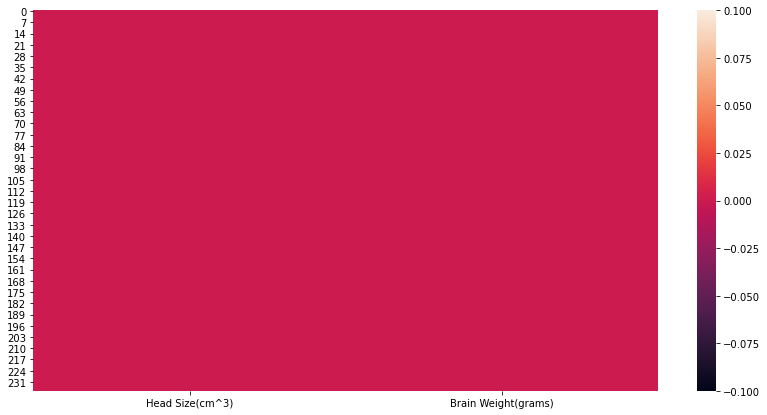

In [18]:
sns.heatmap(data.isnull());

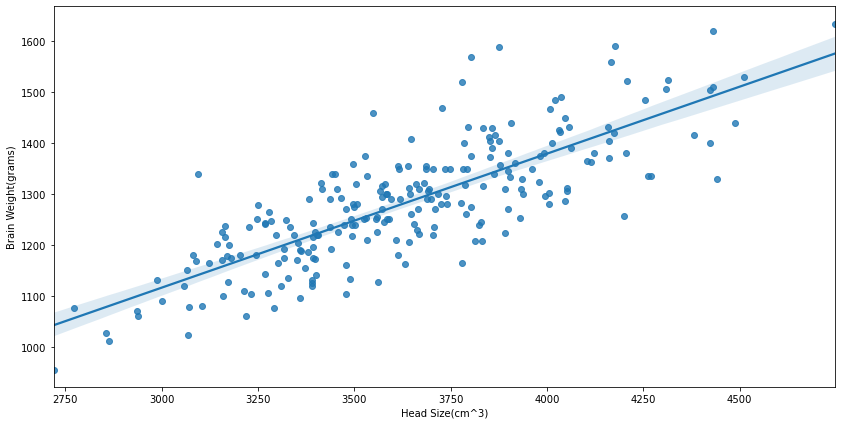

In [19]:
sns.regplot(x='Head Size(cm^3)',y='Brain Weight(grams)', data=data);

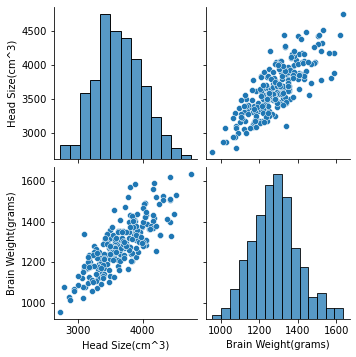

In [20]:
sns.pairplot(data = data);

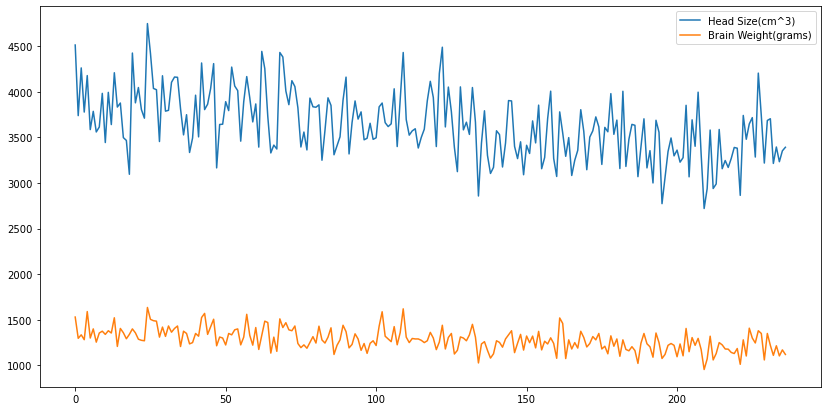

In [21]:
data.plot();

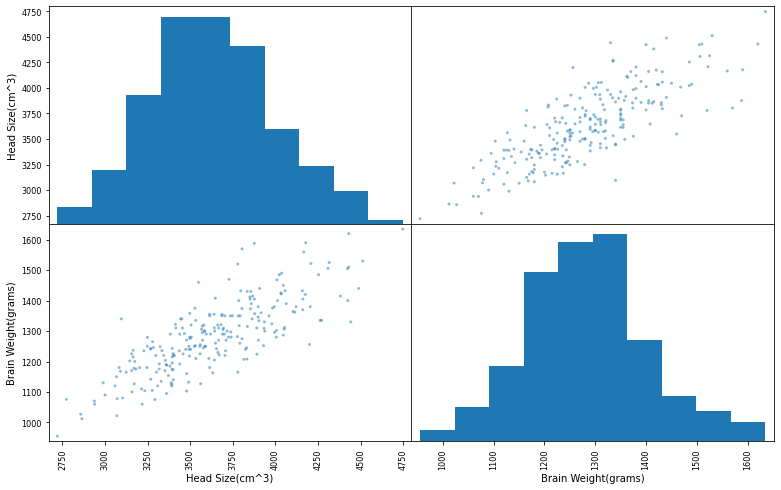

In [60]:
pd.plotting.scatter_matrix(data , diagonal='hist', figsize = (13,8));


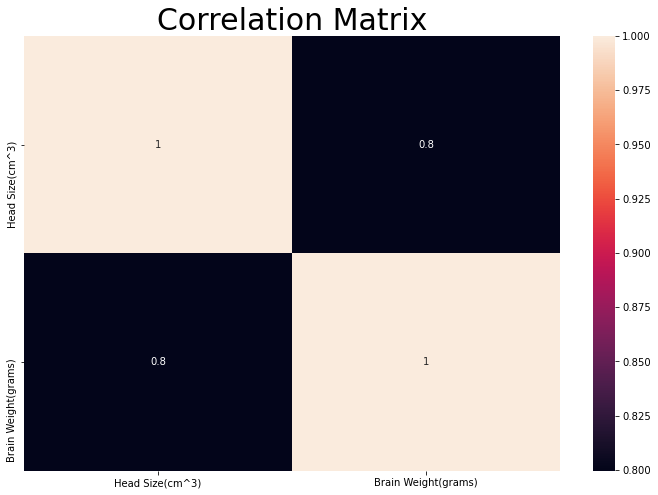

In [64]:
plt.figure(figsize  = (12,8))
sns.heatmap(data.corr() , annot=True)
plt.title('Correlation Matrix' , fontsize = 30)
plt.show()

In [24]:
data.head()

,Head Size(cm^3),Brain Weight(grams)
0,4512,1530
1,3738,1297
2,4261,1335
3,3777,1282
4,4177,1590


In [25]:
X = data.iloc[:,:-1].values
Y = data.iloc[:,1].values

In [26]:
mean_x = np.mean(X)
mean_y = np.mean(Y)

N = 0
D = 0
m = len(X)
for i in range(m):
    N += (X[i] -mean_x) * (Y[i] - mean_y)
    D += (X[i] - mean_x)**2
    
b1 = N/D
b0 = mean_y - b1*mean_x

In [29]:
print('The Slope of the Line = ' , b1)
print('\n')
print('The Intercept of the Line =' , b0)

The Slope of the Line =  [0.26342934]


The Intercept of the Line = [325.57342105]


# $$Y = mX + C$$
$$Y = 0.26 * X + 325.57$$

In [30]:
ss_t = 0
ss_r  = 0 
for i in range(m):
    y_pred = b0 + b1*X[i]
    ss_t += (y_pred - Y[i])**2
    ss_r += (Y[i] - mean_y)**2
    
r_squared = 1 - (ss_t / ss_r)
print('R-Squared = ', r_squared*100)

R-Squared =  [63.931172]


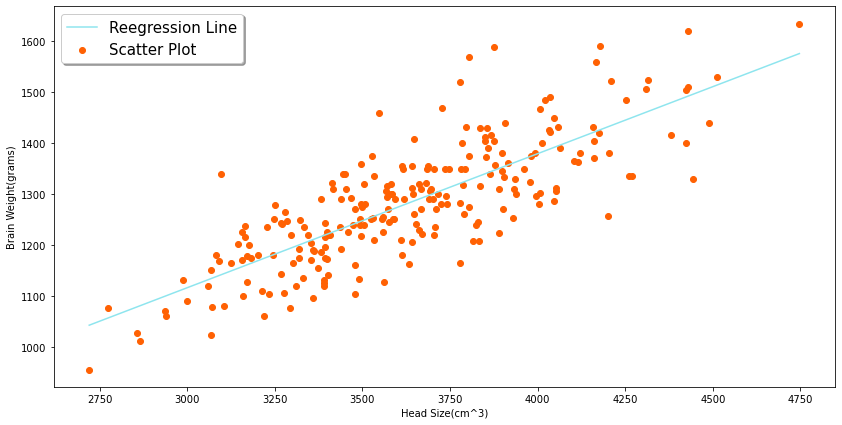

In [40]:
max_x = np.max(X)
min_x = np.min(X)

x = np.linspace(min_x ,max_x ,100000)
y = b0 + b1*x

plt.figure(figsize = (14,7))
plt.plot(x,y,color = "#8EE5EE", label = "Reegression Line")
plt.scatter(X,Y,c = "#FF6103", label = "Scatter Plot")
plt.xlabel("Head Size(cm^3)")
plt.ylabel("Brain Weight(grams)")
plt.legend(prop = {'size':15} , frameon = True , fancybox = True , framealpha = 1, shadow =True)
plt.show()

In [41]:
from sklearn.model_selection import train_test_split
X_train , X_test , Y_train ,Y_test = train_test_split(X,Y,test_size = 0.25, random_state =1)

In [43]:
from sklearn.linear_model import LinearRegression
linmodel = LinearRegression()

In [44]:
linmodel.fit(X_train , Y_train)

LinearRegression()

In [45]:
linmodel_pred = linmodel.predict(X_test)

In [47]:
df = pd.DataFrame({'Actual_Values':Y_test , 'Predicted_Values':linmodel_pred})

In [50]:
df.head()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [51]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(linmodel ,X_train ,Y_train).mean()*100)

62.83061374792137


In [54]:
score = linmodel.score(X_test , Y_test)*100
print('% Accuracy Score = ',score)

% Accuracy Score =  57.264741728117286


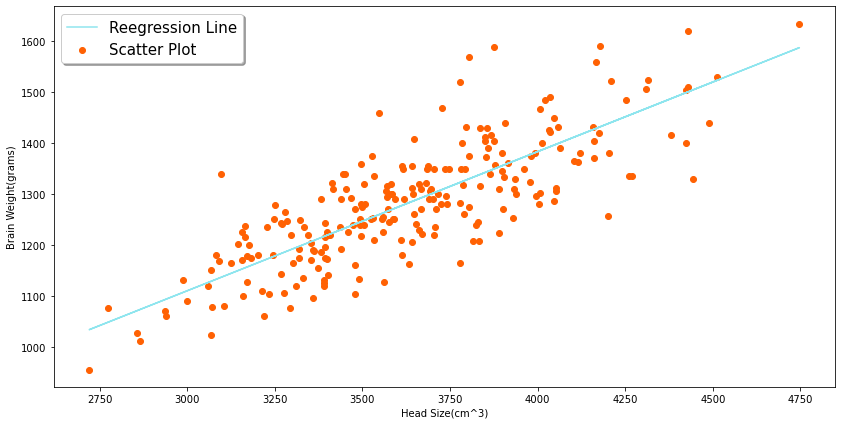

In [55]:
line = linmodel.coef_ * X + linmodel.intercept_

plt.figure(figsize = (14,7))
plt.plot(X,line,color = "#8EE5EE", label = "Reegression Line")
plt.scatter(X,Y,c = "#FF6103", label = "Scatter Plot")
plt.xlabel("Head Size(cm^3)")
plt.ylabel("Brain Weight(grams)")
plt.legend(prop = {'size':15} , frameon = True , fancybox = True , framealpha = 1, shadow =True)
plt.show()

In [58]:
Head_Size = 1251
own_prediction = linmodel.predict([[Head_Size]])

print('Head Size(cm^m)=' , Head_Size)
print('Predicted Brain Weight(grams)=', own_prediction[0])

Head Size(cm^m)= 1251
Predicted Brain Weight(grams)= 631.4768686343455


---

---

---

# $$Logistic Regression Algorithm$$

---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import lux
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = 14,7
from pandas.plotting import scatter_matrix

In [13]:
data = pd.read_csv('E://Desktop//train.csv')

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.tail()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [5]:
data

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [14]:
data.info()

<class 'lux.core.frame.LuxDataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [15]:
data.describe();

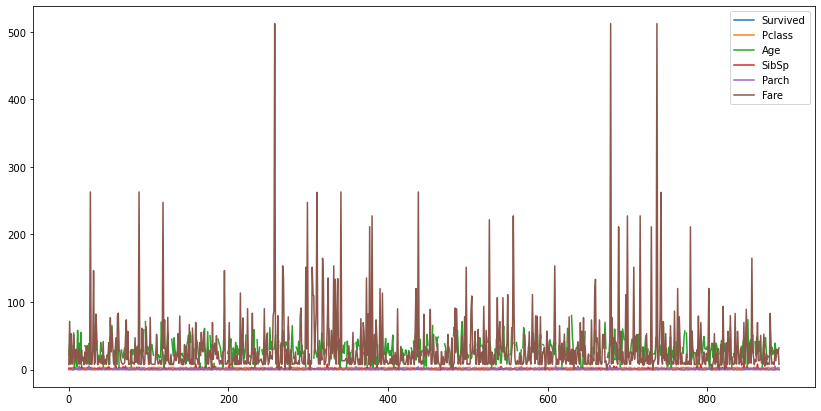

In [16]:
data.drop('PassengerId', axis = 1,  inplace = True)
data.plot();

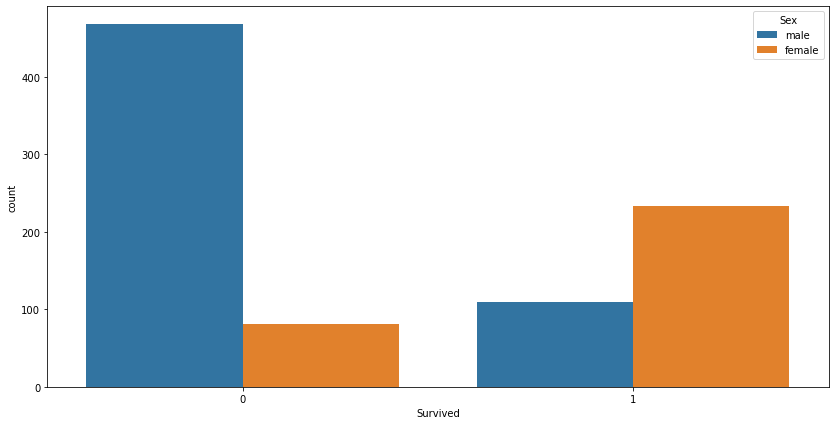

In [18]:
sns.countplot('Survived' , hue = 'Sex',  data = data);

In [19]:
data.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [20]:
data.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [21]:
data.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64


In [22]:
data.drop('Cabin' , axis = 1, inplace = True)

In [23]:
data.dropna(inplace = True)

In [24]:
data.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64


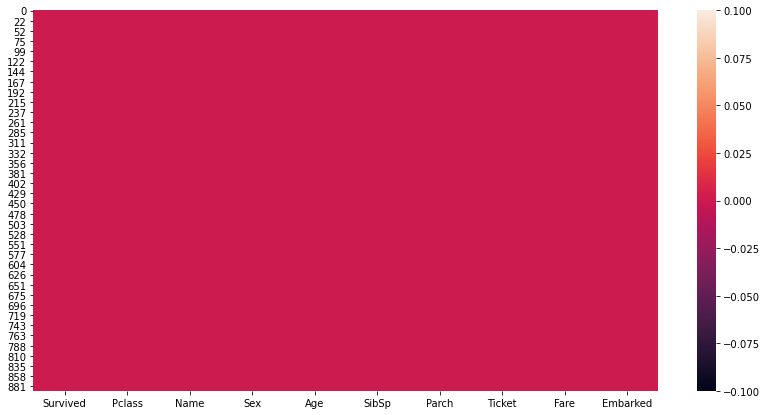

In [25]:
sns.heatmap(data.isnull());

---

**Converting Categorical to Binary**

In [27]:
sex = pd.get_dummies(data['Sex'] ,drop_first=True)

In [28]:
emk = pd.get_dummies(data['Embarked'] ,drop_first=True)

In [29]:
pcl =  pd.get_dummies(data['Pclass'] , drop_first=True)

In [30]:
data = pd.concat([data ,sex , emk , pcl] ,axis = 1)

In [31]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S,2,3
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1,0,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0,0,0
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1,0,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1,0,0
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1,0,1


In [32]:
data.drop(['Pclass', 'Name', 'Sex','Ticket' , 'Embarked'] ,axis = 1, inplace = True)

In [33]:
data.head()

,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,0,22.0,1,0,7.2500,1,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,1
3,1,35.0,1,0,53.1000,0,0,1,0,0
4,0,35.0,0,0,8.0500,1,0,1,0,1


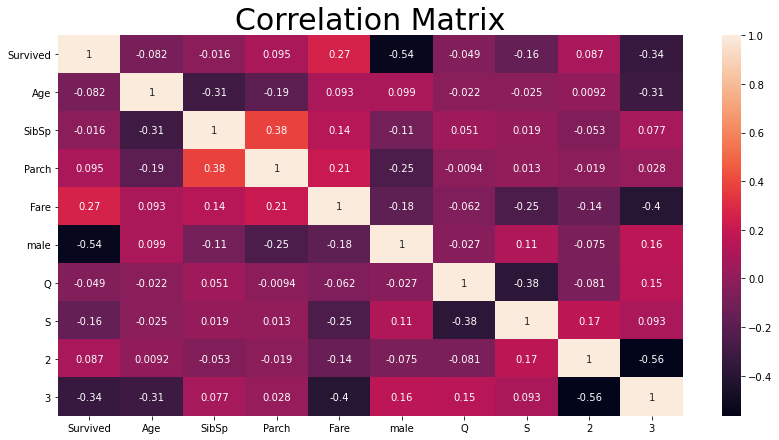

In [35]:
sns.heatmap(data.corr(), annot=True)
plt.title('Correlation Matrix' , fontsize = 30)
plt.show()

In [36]:
X = data.drop('Survived', axis = 1)
y = data['Survived']

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train ,y_test = train_test_split(X,y,test_size = 0.25 , random_state=1)

In [41]:
from sklearn.linear_model import LogisticRegression

In [42]:
logmodel = LogisticRegression()

In [43]:
logmodel.fit(X_train ,y_train)

LogisticRegression()

In [44]:
logmodel_pred = logmodel.predict(X_test)

In [45]:
df = pd.DataFrame({'Actual_Survived':y_test, 'Predicted_Survived':logmodel_pred})

In [46]:
df.head()

,Actual_Survived,Predicted_Survived
689,1,1
279,1,0
508,0,0
9,1,1
496,1,1


In [47]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(logmodel , X_train ,y_train).mean()*100)

79.01957326750131


In [51]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test , logmodel_pred)*100)

78.08988764044943


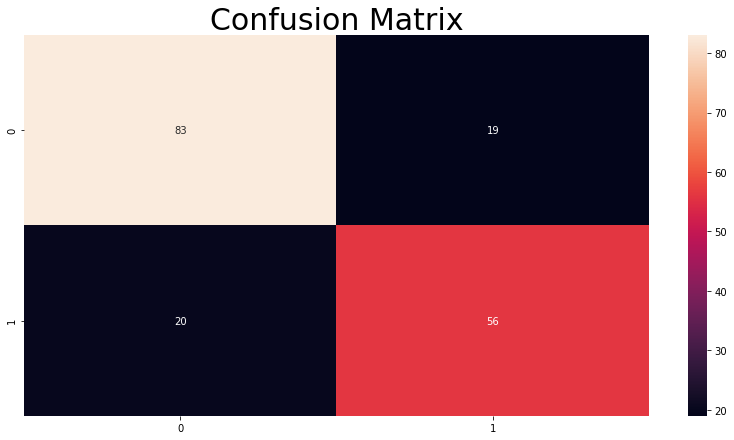

In [52]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test ,logmodel_pred), annot=True)
plt.title("Confusion Matrix", fontsize = 30)
plt.show()

In [53]:
from sklearn.metrics import classification_report
print(classification_report(y_test , logmodel_pred))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81       102
           1       0.75      0.74      0.74        76

    accuracy                           0.78       178
   macro avg       0.78      0.78      0.78       178
weighted avg       0.78      0.78      0.78       178



**Sigmoid Function**

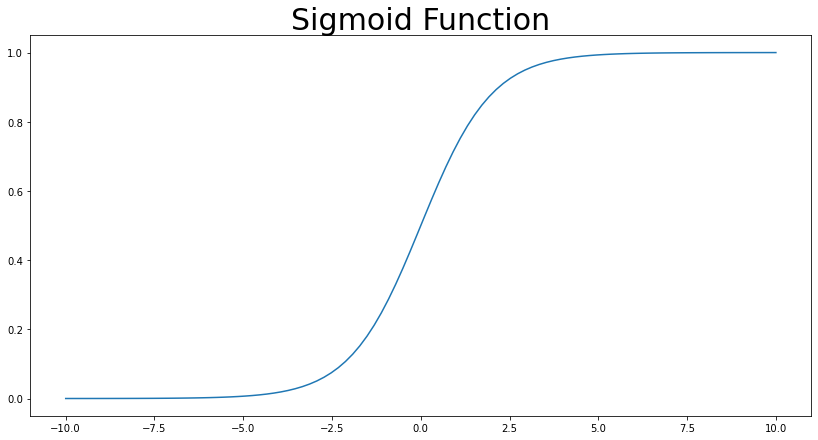

In [54]:
x = np.linspace(-10,10,100)
z = 1 / (1 + np.exp(-x))
plt.plot(x,z)
plt.title('Sigmoid Function' , fontsize = 30)
plt.show()

---

---

---

# $$Decision-Tree-Classification$$

---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import lux
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = 14,7

In [2]:
from sklearn.datasets import load_iris

In [3]:
iris = load_iris()

In [4]:
X = pd.DataFrame(iris.data , columns =['Sepal Length' , 'Sepal Width', 'Petal Length', 'Petal Width'])
y = pd.DataFrame(iris.target , columns = ['Target'])

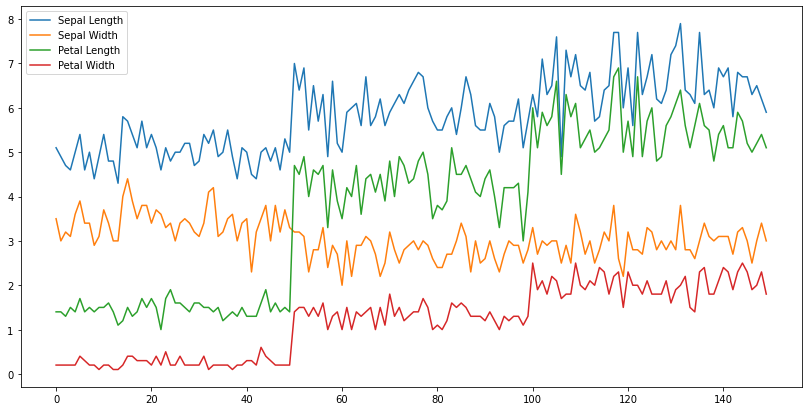

In [5]:
X.plot();

In [6]:
X.info()

<class 'lux.core.frame.LuxDataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal Length  150 non-null    float64
 1   Sepal Width   150 non-null    float64
 2   Petal Length  150 non-null    float64
 3   Petal Width   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [7]:
X.describe()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

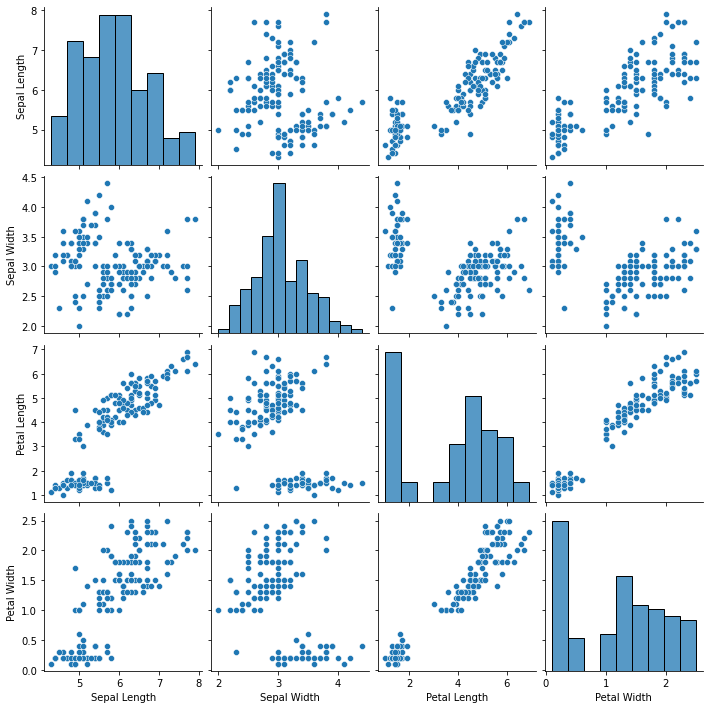

In [8]:
sns.pairplot(data = X);

In [10]:
X.isnull().sum()

Sepal Length    0
Sepal Width     0
Petal Length    0
Petal Width     0
dtype: int64


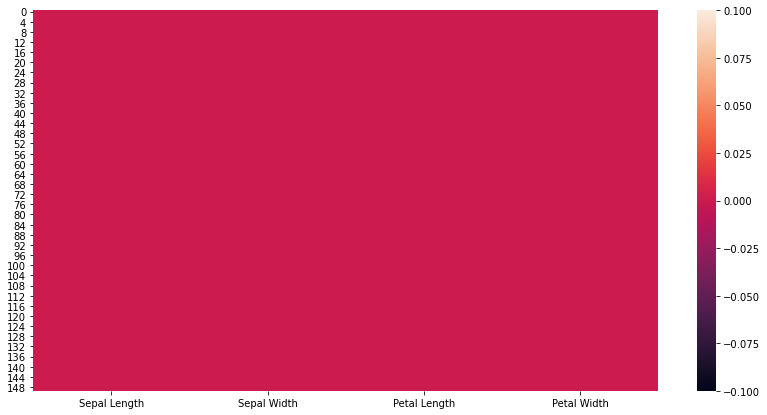

In [11]:
sns.heatmap(X.isnull());

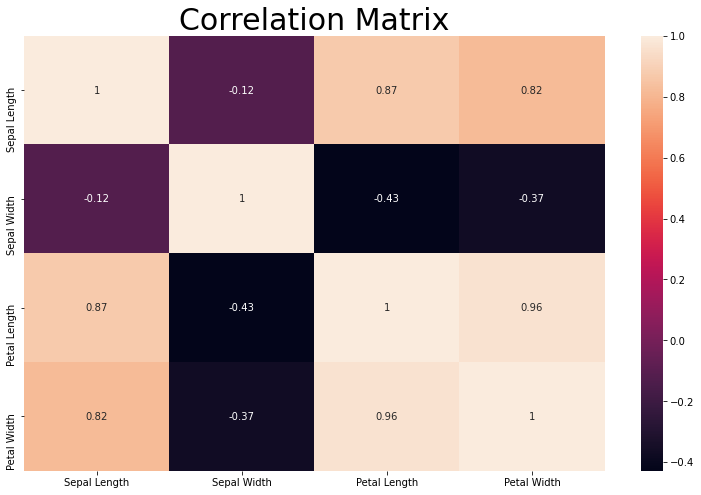

In [22]:
plt.figure(figsize = (13,8))
sns.heatmap(X.corr(),annot=True)
plt.title("Correlation Matrix" , fontsize = 30)
plt.show()

In [13]:
from sklearn.model_selection import train_test_split
X_train ,X_test , y_train , y_test = train_test_split(X,y,test_size = 0.25 , random_state  = 1)

In [14]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [15]:
clf = DecisionTreeClassifier(max_depth= 3)

In [16]:
clf.fit(X_train , y_train)

DecisionTreeClassifier(max_depth=3)

In [17]:
clf_pred = clf.predict(X_test)

In [18]:
clf_pred

array([0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       2, 0, 2, 1, 0, 0, 1, 2, 1, 2, 1, 2, 2, 0, 1, 0])

In [19]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(clf , X_train , y_train).mean()*100)

92.80632411067194


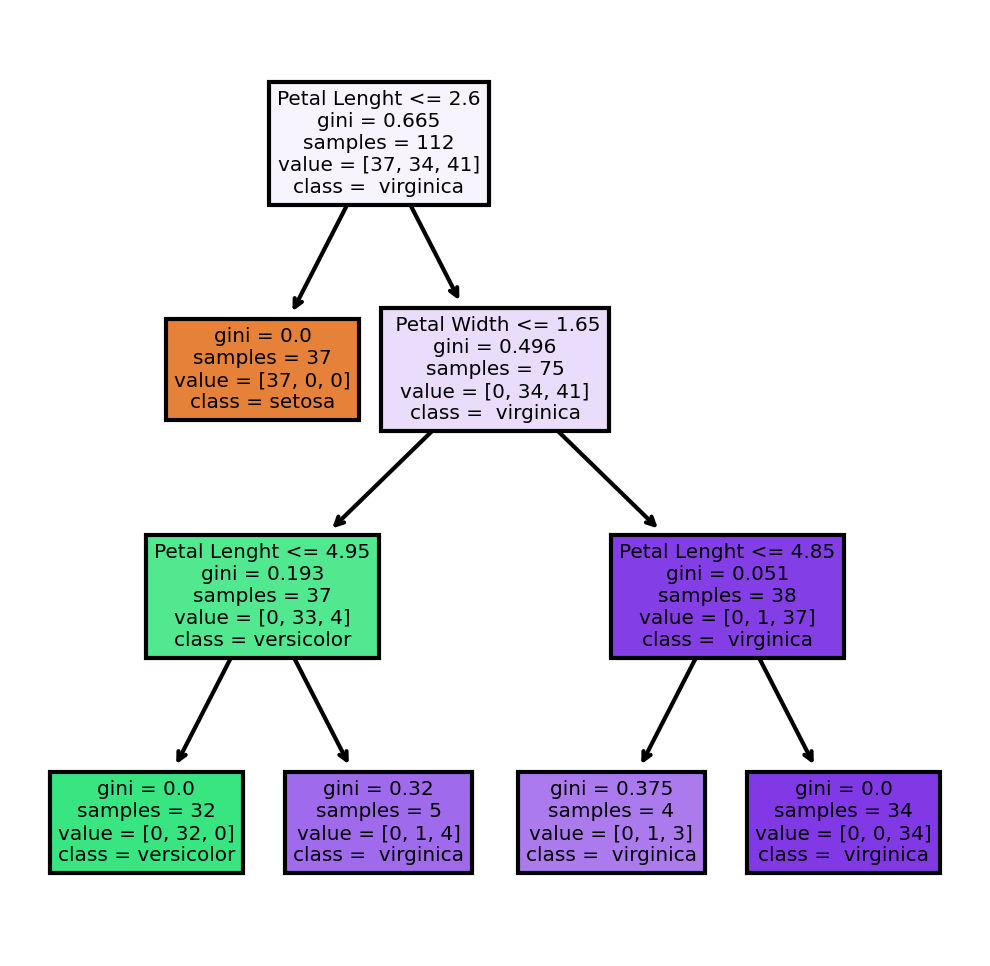

In [20]:
Features = ['Sepal Length', 'Sepal Width', 'Petal Lenght', ' Petal Width']
Class = ['setosa', 'versicolor', ' virginica']

fig,  ax = plt.subplots(nrows=1 , ncols=1 , dpi =300, figsize=(4,4))
tree.plot_tree(clf , 
               feature_names=Features,
              class_names=Class, 
              filled = True)
fig.savefig('ms9.png')
fig.show()

---

---

---

# $$K-Nearest-Neighbors-Algorithm$$

---

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import lux
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = 14,7
from pandas.plotting import scatter_matrix

In [2]:
data = pd.read_csv('E://Desktop/K-Nearest-Neighbor.csv')

In [3]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
data.tail()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [5]:
data

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [6]:
data.Purchased.value_counts()

0    15
1     7
Name: Purchased, dtype: int64

In [8]:
data.Gender.value_counts()

Male      13
Female     9
Name: Gender, dtype: int64

In [9]:
data.info()

<class 'lux.core.frame.LuxDataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          22 non-null     object
 1   Gender           22 non-null     object
 2   Age              22 non-null     int64 
 3   EstimatedSalary  22 non-null     int64 
 4   Purchased        22 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 1008.0+ bytes


In [10]:
data.drop('User ID' , axis = 1 , inplace = True)

In [11]:
data['Gender'] = data['Gender'].astype('category')

In [12]:
data['Gender'] = data['Gender'].cat.codes

In [13]:
data.info()

<class 'lux.core.frame.LuxDataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Gender           22 non-null     int8 
 1   Age              22 non-null     int64
 2   EstimatedSalary  22 non-null     int64
 3   Purchased        22 non-null     int64
dtypes: int64(3), int8(1)
memory usage: 678.0 bytes


In [16]:
data.describe()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [17]:
data.isnull().sum()

Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64


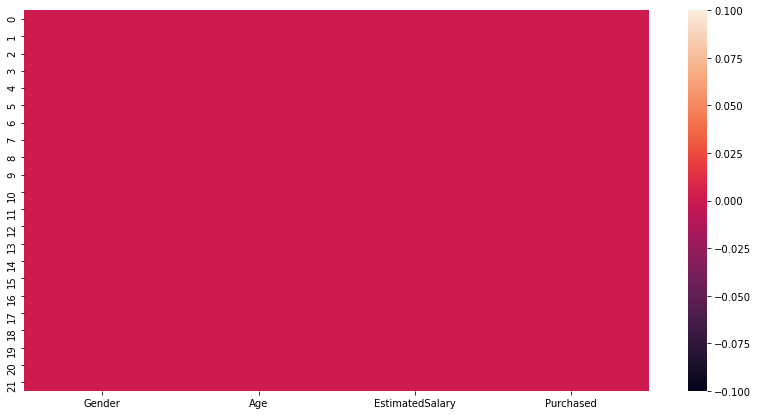

In [18]:
sns.heatmap(data.isnull());

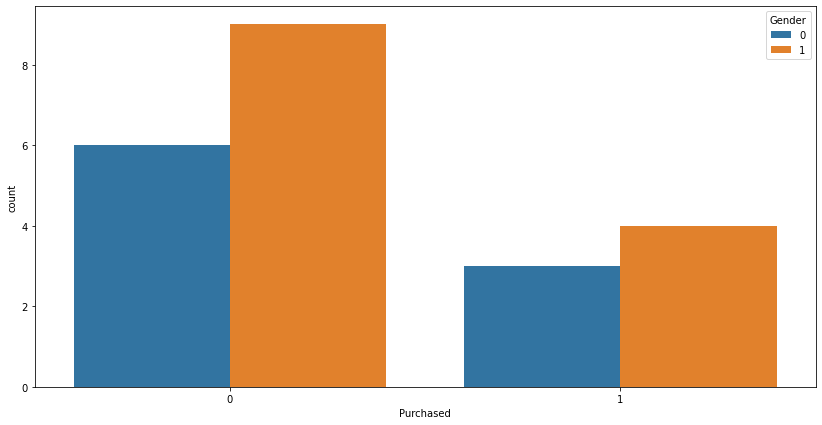

In [20]:
sns.countplot('Purchased' ,hue = 'Gender' , data  =data);

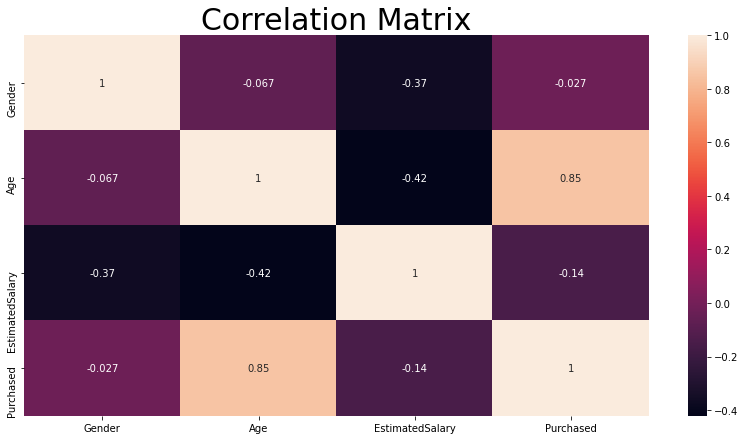

In [23]:
sns.heatmap(data.corr() ,annot=True)
plt.title("Correlation Matrix" , fontsize = 30)
plt.show()

---

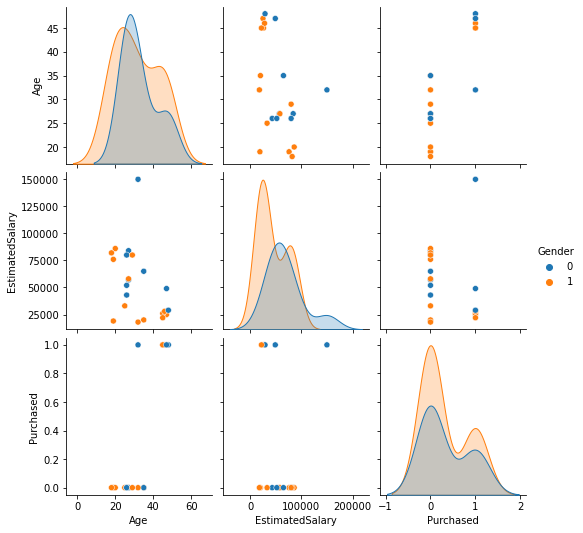

In [24]:
sns.pairplot(data = data ,hue = 'Gender');

---

In [28]:
data.head()

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0


In [32]:
X = data.iloc[:, :-1].values
y = data.iloc[: ,3].values

In [34]:
from sklearn.model_selection import train_test_split
X_train , X_test  ,y_train , y_test = train_test_split(X,y,test_size = 0.25, random_state = 1)

In [35]:
from sklearn.preprocessing import StandardScaler

In [38]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [46]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5 , metric= 'minkowski' , p = 2)

In [47]:
knn.fit(X_train  ,y_train)

KNeighborsClassifier()

In [48]:
knn_pred = knn.predict(X_test)

In [49]:
df = pd.DataFrame({'Actual_Purchased':y_test , 'Predicted_Purchased':knn_pred})

In [53]:
df

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [54]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(knn , X_train , y_train).mean()*100)

74.99999999999999


In [55]:
score = knn.score(X_test , y_test)
print("% Accuracy Score = " , score*100)

% Accuracy Score =  100.0


In [56]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test , knn_pred)*100)

100.0


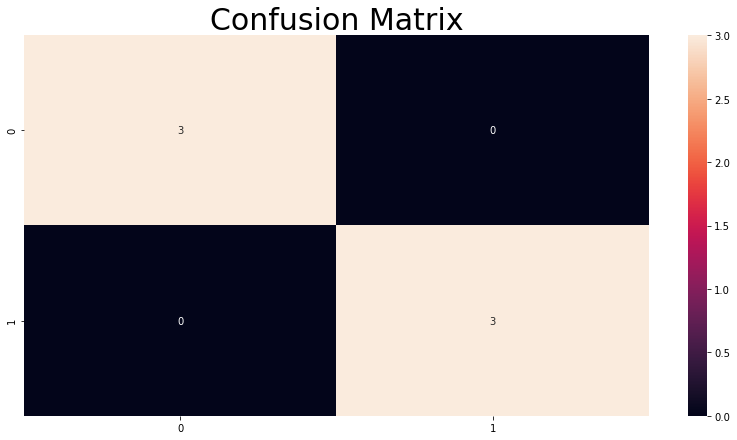

In [57]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test  , knn_pred), annot=True)
plt.title('Confusion Matrix',  fontsize = 30)
plt.show()

In [59]:
from sklearn.metrics import classification_report 
print(classification_report(y_test , knn_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         3

    accuracy                           1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00         6



---

---

---

# $$Support-Vector-Machine$$

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import lux
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = 14,7
from pandas.plotting import scatter_matrix

In [10]:
data = pd.read_csv('E://Desktop/svm.csv')

In [4]:
data.head()

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [5]:
data.tail()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [6]:
data

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

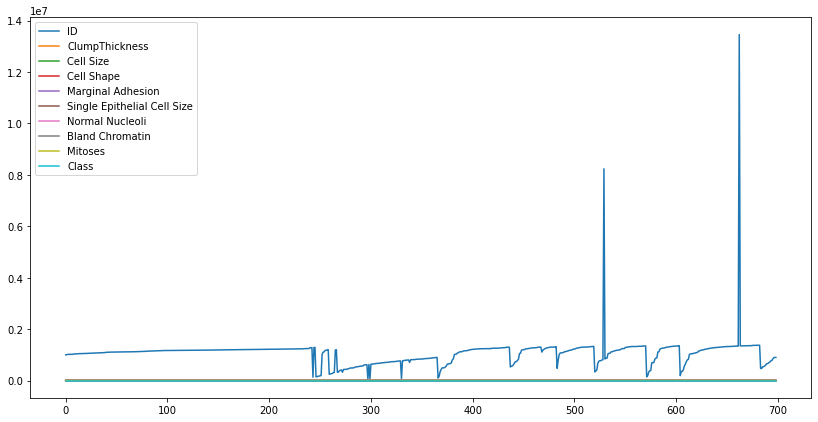

In [11]:
data.plot();

In [13]:
data.info()

<class 'lux.core.frame.LuxDataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   ID                           699 non-null    int64 
 1   ClumpThickness               699 non-null    int64 
 2   Cell Size                    699 non-null    int64 
 3   Cell Shape                   699 non-null    int64 
 4   Marginal Adhesion            699 non-null    int64 
 5   Single Epithelial Cell Size  699 non-null    int64 
 6   Bare Nuclei                  699 non-null    object
 7   Normal Nucleoli              699 non-null    int64 
 8   Bland Chromatin              699 non-null    int64 
 9   Mitoses                      699 non-null    int64 
 10  Class                        699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [14]:
data.describe().transpose()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [15]:
data.isnull().sum()

ID                             0
ClumpThickness                 0
Cell Size                      0
Cell Shape                     0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Normal Nucleoli                0
Bland Chromatin                0
Mitoses                        0
Class                          0
dtype: int64


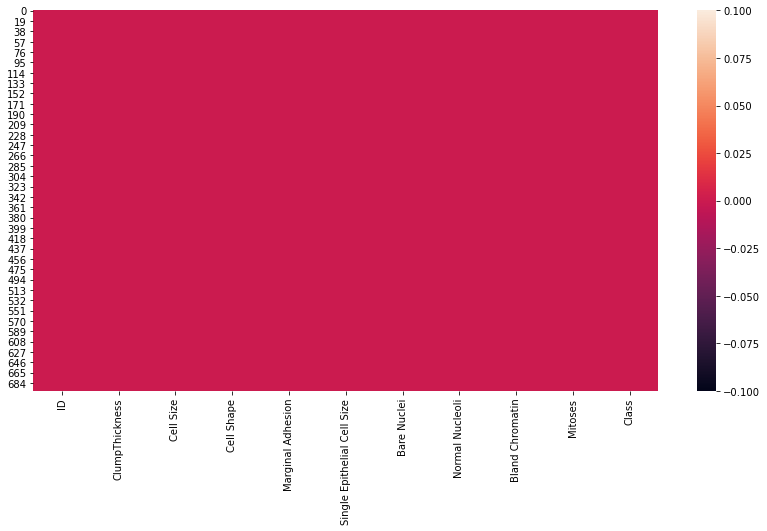

In [16]:
sns.heatmap(data.isnull());

In [29]:
data = data.replace('?',0)
data['Bare Nuclei'] = data['Bare Nuclei'].astype('float64')

In [30]:
data.info()

<class 'lux.core.frame.LuxDataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           699 non-null    int64  
 1   ClumpThickness               699 non-null    int64  
 2   Cell Size                    699 non-null    int64  
 3   Cell Shape                   699 non-null    int64  
 4   Marginal Adhesion            699 non-null    int64  
 5   Single Epithelial Cell Size  699 non-null    int64  
 6   Bare Nuclei                  699 non-null    float64
 7   Normal Nucleoli              699 non-null    int64  
 8   Bland Chromatin              699 non-null    int64  
 9   Mitoses                      699 non-null    int64  
 10  Class                        699 non-null    int64  
dtypes: float64(1), int64(10)
memory usage: 60.2 KB


In [31]:
data.Class.value_counts()

2    458
4    241
Name: Class, dtype: int64

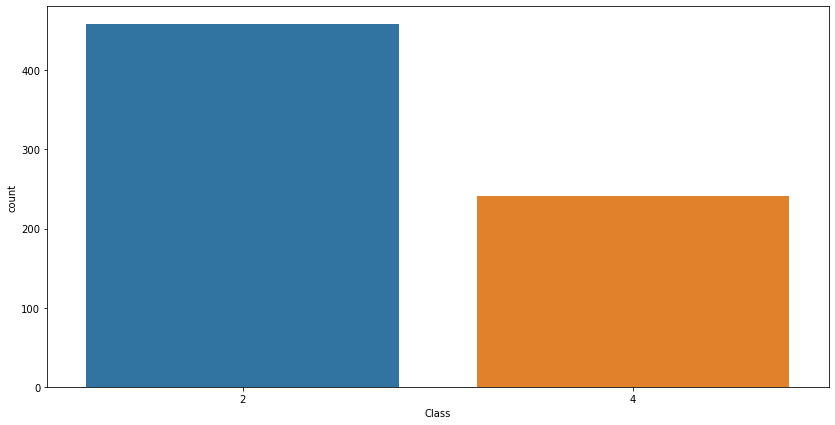

In [51]:
sns.countplot('Class' , data = data);

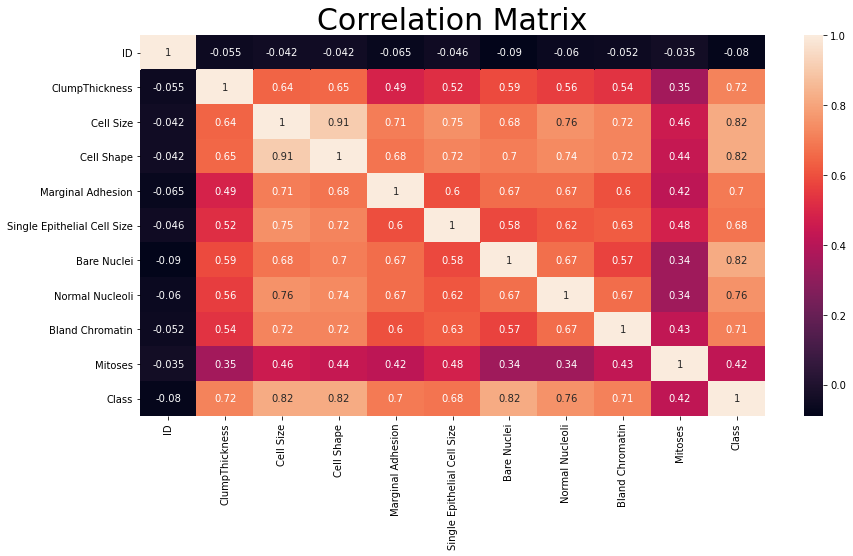

In [55]:
sns.heatmap(data.corr(), annot=True)
plt.title("Correlation Matrix" , fontsize = 30)
plt.show()

---

In [34]:
X = data.drop(['ID', 'Class'] , axis = 1)
y = data['Class']

In [56]:
y

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [37]:
from sklearn.model_selection import train_test_split
X_train , X_test ,y_train , y_test = train_test_split(X,y,test_size = 0.25, random_state = 1)

In [38]:
from sklearn.svm import SVC

In [39]:
svm = SVC(C = 0.1 , kernel='linear',gamma=1)

In [40]:
svm.fit(X_train , y_train)

SVC(C=0.1, gamma=1, kernel='linear')

In [41]:
svm_pred = svm.predict(X_test)

In [42]:
df = pd.DataFrame({'Actual_Class':y_test , 'Predicted_Class':svm_pred})

In [43]:
df.head()

,Actual_Class,Predicted_Class
584,2,2
417,2,2
606,2,2
349,4,4
134,2,2


In [48]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(svm,X_train , y_train).mean()*100,"%")

95.60256410256412 %


In [50]:
score_on_train_data = svm.score(X_train, y_train)*100
print('% Accuracy Score on Training Data=',score_on_train_data,"%")
print('\n')
score_on_test_data = svm.score(X_test ,y_test)*100
print('% Accuracy Score on Test Data=', score_on_test_data,"%")

% Accuracy Score on Training Data= 96.56488549618321 %


% Accuracy Score on Test Data= 97.71428571428571 %


In [52]:
from sklearn.metrics import accuracy_score , confusion_matrix , classification_report

In [54]:
print(accuracy_score(y_test , svm_pred)*100)

97.71428571428571


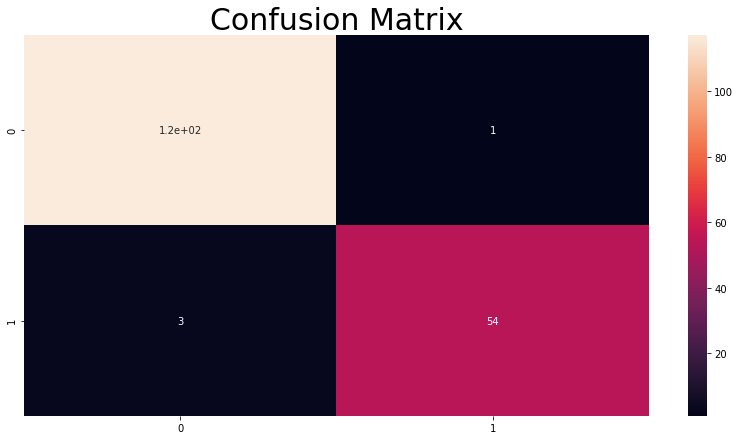

In [59]:
sns.heatmap(confusion_matrix(y_test , svm_pred), annot=True)
plt.title('Confusion Matrix' , fontsize = 30)
plt.show()

In [63]:
print("Classification Report :  ")
print('----------------------')
print("\n")
print(classification_report(y_test , svm_pred))
print('-------------------**************----------------------')

Classification Report :  
----------------------


              precision    recall  f1-score   support

           2       0.97      0.99      0.98       118
           4       0.98      0.95      0.96        57

    accuracy                           0.98       175
   macro avg       0.98      0.97      0.97       175
weighted avg       0.98      0.98      0.98       175

-------------------**************----------------------


---

---

---

# $$K-Means-Clustering-Algorithm$$

---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import lux
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = 14,7
from pandas.plotting import scatter_matrix

In [2]:
data = pd.read_csv('E://Desktop//Segmentation_Customers.csv')

In [3]:
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
data.tail()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [5]:
data

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [6]:
data.info()

<class 'lux.core.frame.LuxDataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
data.describe()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

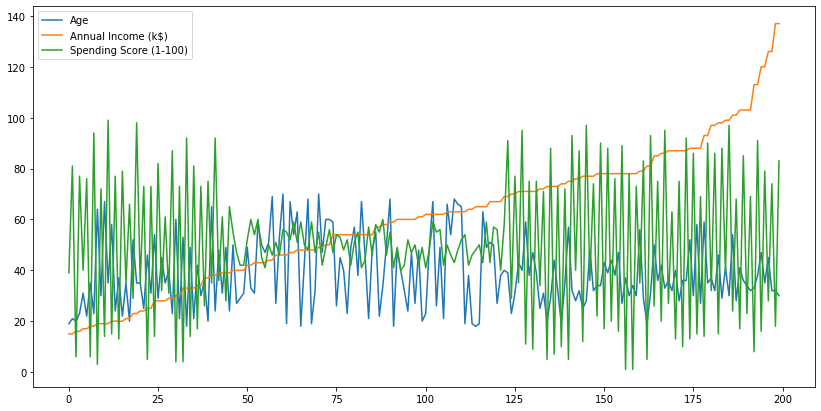

In [9]:
data.drop('CustomerID'  ,axis = 1, inplace = True)
data.plot();

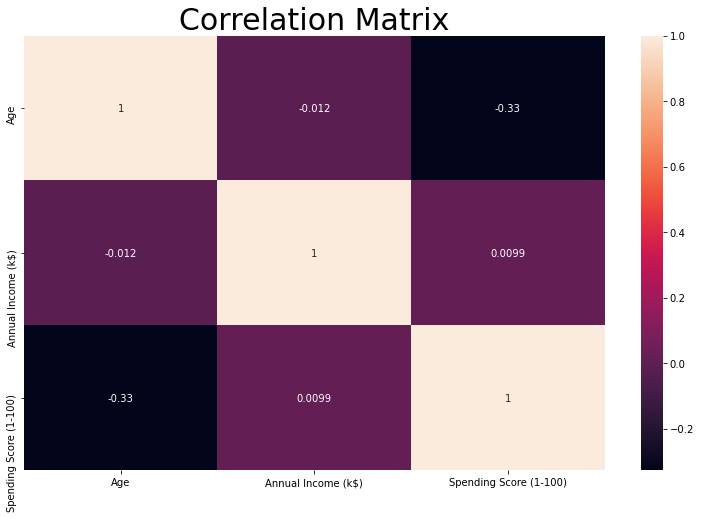

In [12]:
plt.figure(figsize =(13,8))
sns.heatmap(data.corr(), annot=True)
plt.title('Correlation Matrix' , fontsize = 30)
plt.show()

In [13]:
data.isnull().sum()

Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


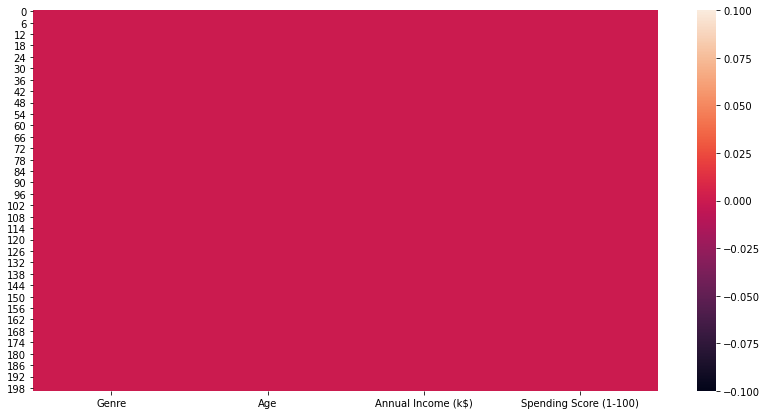

In [14]:
sns.heatmap(data.isnull());

In [16]:
data.Genre.value_counts()

Female    112
Male       88
Name: Genre, dtype: int64

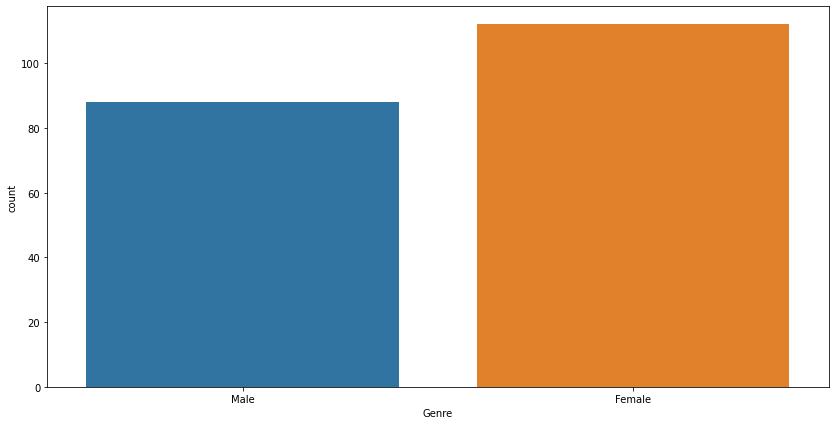

In [18]:
sns.countplot('Genre' , data = data);

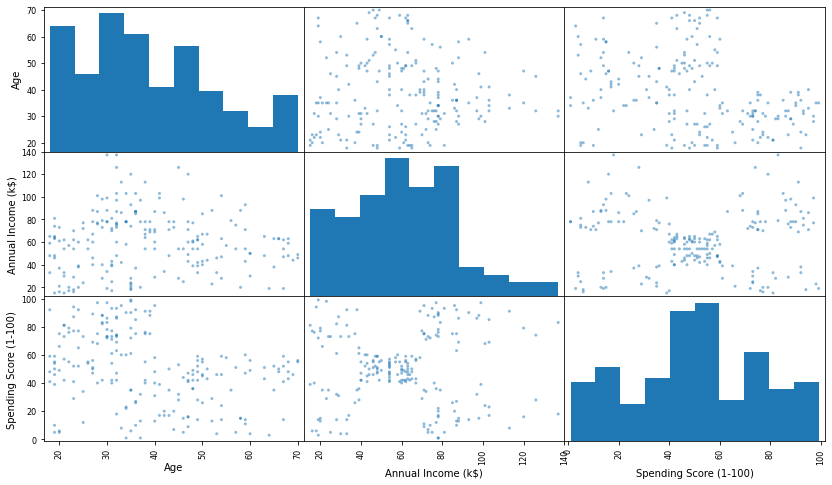

In [19]:
pd.plotting.scatter_matrix(data , diagonal='hist' , figsize =(14,8));

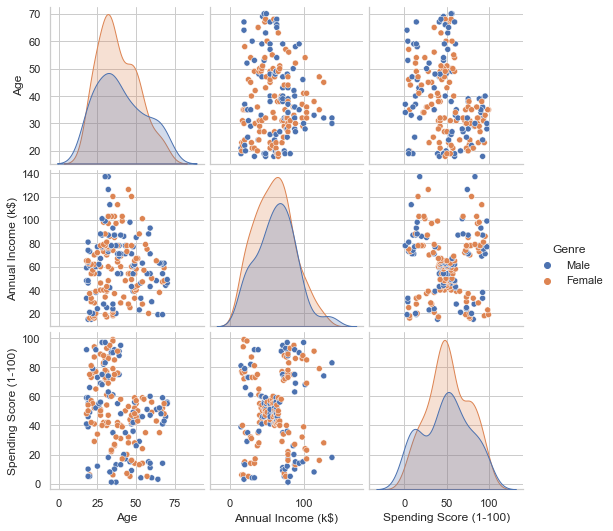

In [44]:
sns.pairplot(data = data , hue  = 'Genre')
plt.show()

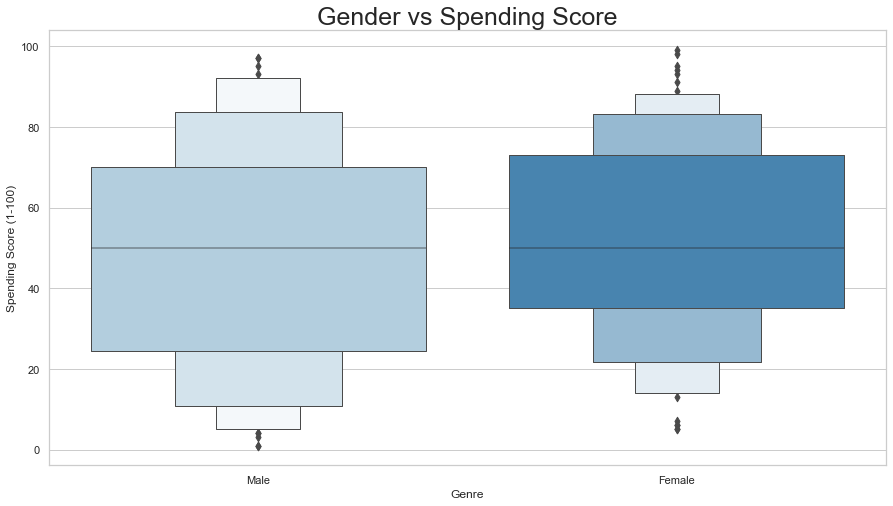

In [50]:
plt.figure(figsize = (15,8))
sns.boxenplot(data['Genre'], data['Spending Score (1-100)'], palette = 'Blues')
plt.title('Gender vs Spending Score', fontsize = 25)
plt.show()

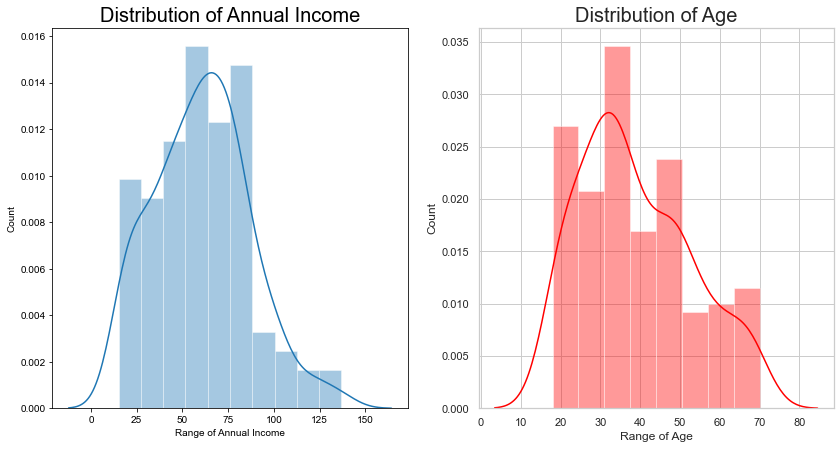

In [22]:
plt.subplot(1, 2, 1)
sns.set(style = 'whitegrid')
sns.distplot(data['Annual Income (k$)'])
plt.title('Distribution of Annual Income', fontsize = 20)
plt.xlabel('Range of Annual Income')
plt.ylabel('Count')


plt.subplot(1, 2, 2)
sns.set(style = 'whitegrid')
sns.distplot(data['Age'], color = 'red')
plt.title('Distribution of Age', fontsize = 20)
plt.xlabel('Range of Age')
plt.ylabel('Count')
plt.show()

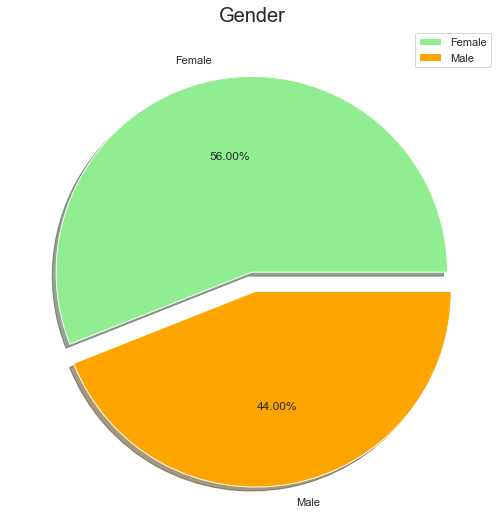

In [24]:
labels = ['Female', 'Male']
size = data['Genre'].value_counts()
colors = ['lightgreen', 'orange']
explode = [0, 0.1]

plt.rcParams['figure.figsize'] = (9, 9)
plt.pie(size, colors = colors, explode = explode, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

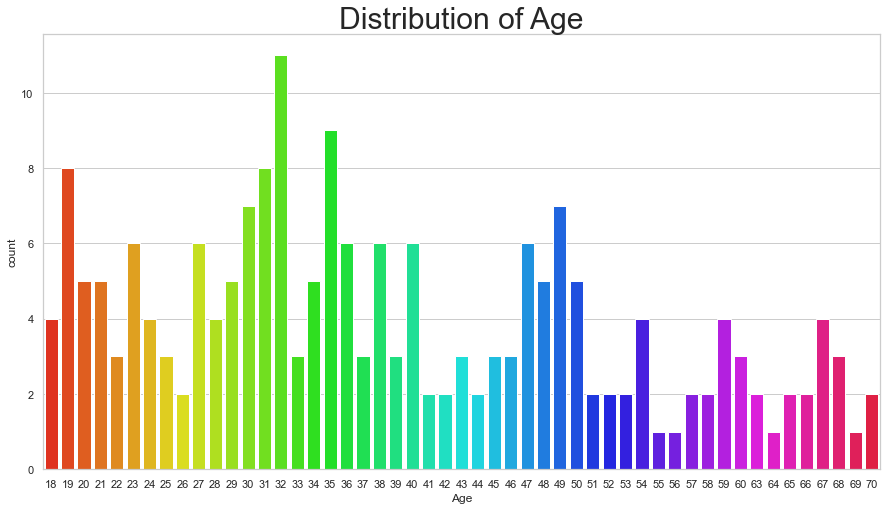

In [31]:
plt.figure(figsize = (15,8))
sns.countplot(data['Age'] , palette='hsv')
plt.title('Distribution of Age' , fontsize = 30)
plt.show()

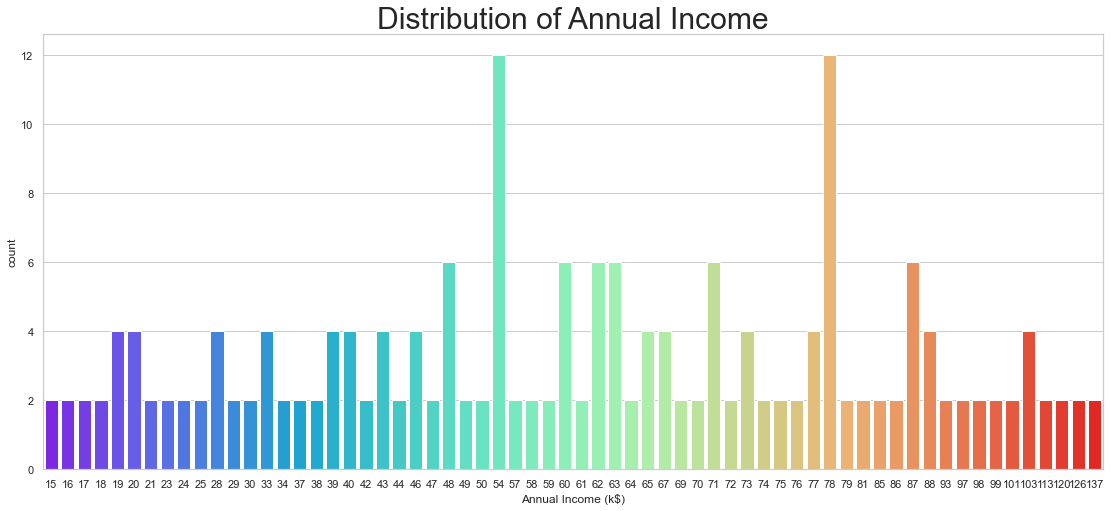

In [32]:
plt.figure(figsize = (19,8))

sns.countplot(data['Annual Income (k$)'] , palette='rainbow')
plt.title('Distribution of Annual Income' , fontsize =30)
plt.show()

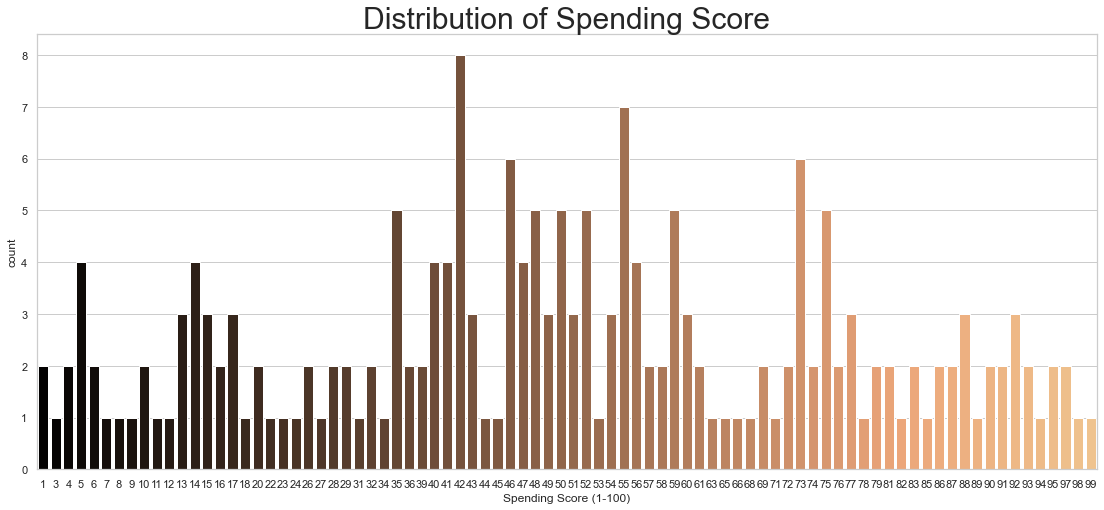

In [40]:
plt.figure(figsize = (19,8))
sns.countplot(data['Spending Score (1-100)'] , palette='copper')
plt.title('Distribution of Spending Score' , fontsize = 30)
plt.show()

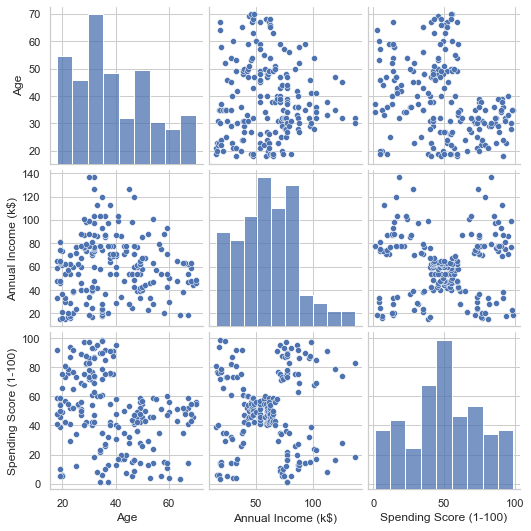

In [51]:
sns.pairplot(data);

---

In [53]:
data.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [73]:
X = data.iloc[: , [2,3]].values
y = data.iloc[:,1].values

In [70]:
from sklearn.cluster import KMeans

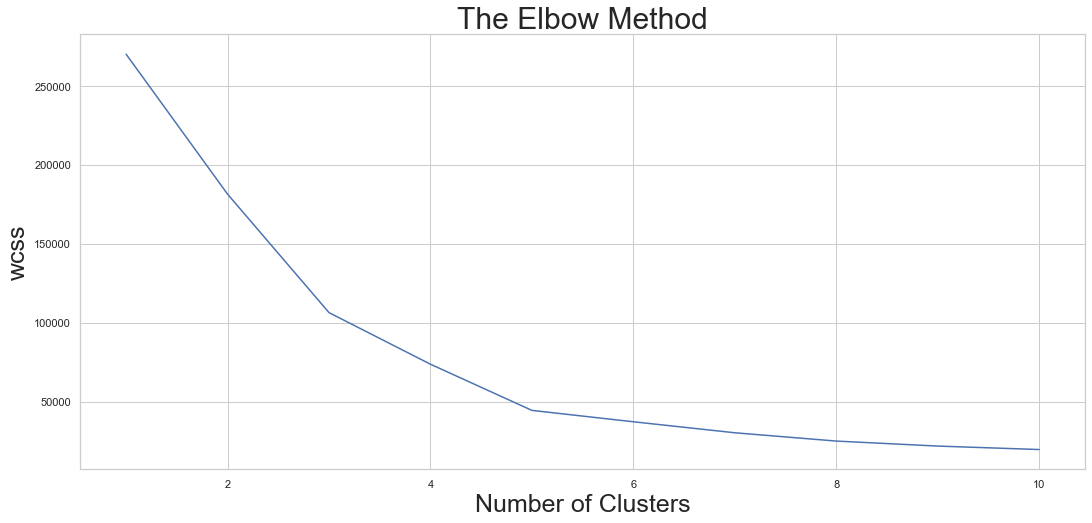

In [77]:
plt.figure(figsize = (18,8))
wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    km.fit(X)
    wcss.append(km.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method', fontsize = 30)
plt.xlabel('Number of Clusters'  ,fontsize = 25)
plt.ylabel('wcss', fontsize = 25)
plt.show()


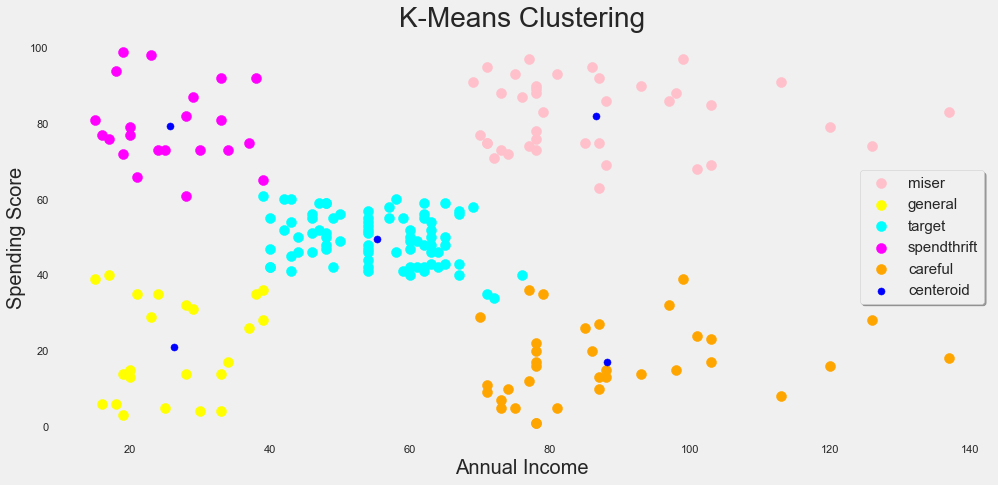

In [91]:
plt.figure(figsize=(15,7))
plt.scatter(X[y_km == 0, 0], X[y_km == 0, 1], s = 100, c = 'pink', label = 'miser')
plt.scatter(X[y_km == 1, 0], X[y_km == 1, 1], s = 100, c = 'yellow', label = 'general')
plt.scatter(X[y_km == 2, 0], X[y_km == 2, 1], s = 100, c = 'cyan', label = 'target')
plt.scatter(X[y_km == 3, 0], X[y_km == 3, 1], s = 100, c = 'magenta', label = 'spendthrift')
plt.scatter(X[y_km == 4, 0], X[y_km == 4, 1], s = 100, c = 'orange', label = 'careful')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centeroid')

plt.style.use('fivethirtyeight')
plt.title('K-Means Clustering', fontsize = 28)
plt.xlabel('Annual Income' , fontsize = 20)
plt.ylabel('Spending Score' , fontsize = 20)
plt.legend(prop={'size':15} , frameon = True , framealpha = 1 , fancybox = True , shadow = True)
plt.grid()
plt.show()

---

---

---

# $$FBProphet-Time-Series-Analysis$$

---

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import lux
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = 14,7
from pandas.plotting import scatter_matrix

In [93]:
data = pd.read_csv('E://Desktop//Covid 19Prediction//India_Covid-19_Dataset.csv')

In [3]:
data.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,01/30/20,6:00 PM,Kerala,1,0,0,0,1
1,2,01/31/20,6:00 PM,Kerala,1,0,0,0,1
2,3,02/01/20,6:00 PM,Kerala,2,0,0,0,2
3,4,02/02/20,6:00 PM,Kerala,3,0,0,0,3
4,5,02/03/20,6:00 PM,Kerala,3,0,0,0,3


In [4]:
data.tail()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [5]:
data

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [6]:
data.info()

<class 'lux.core.frame.LuxDataFrame'>
RangeIndex: 5336 entries, 0 to 5335
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Sno                       5336 non-null   int64 
 1   Date                      5336 non-null   object
 2   Time                      5336 non-null   object
 3   State/UnionTerritory      5336 non-null   object
 4   ConfirmedIndianNational   5336 non-null   object
 5   ConfirmedForeignNational  5336 non-null   object
 6   Cured                     5336 non-null   int64 
 7   Deaths                    5336 non-null   int64 
 8   Confirmed                 5336 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 375.3+ KB


In [22]:
data['Date'] = pd.to_datetime(data['Date'])
data.info()

<class 'lux.core.frame.LuxDataFrame'>
RangeIndex: 5336 entries, 0 to 5335
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Sno                       5336 non-null   int64         
 1   Date                      5336 non-null   datetime64[ns]
 2   Time                      5336 non-null   object        
 3   State/UnionTerritory      5336 non-null   object        
 4   ConfirmedIndianNational   5336 non-null   object        
 5   ConfirmedForeignNational  5336 non-null   object        
 6   Cured                     5336 non-null   int64         
 7   Deaths                    5336 non-null   int64         
 8   Confirmed                 5336 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(4)
memory usage: 375.3+ KB


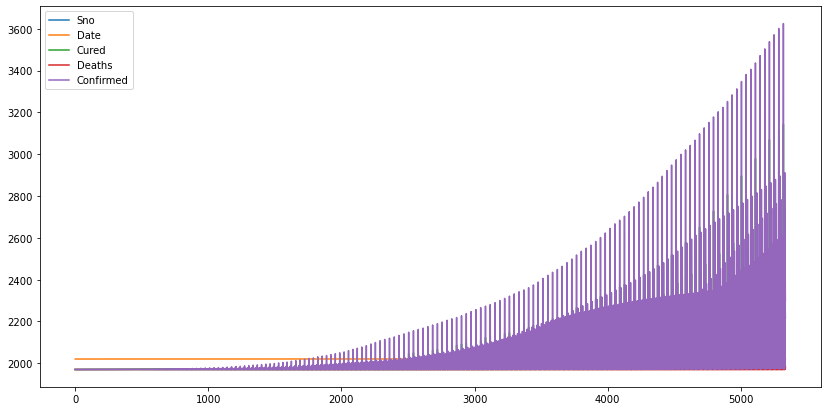

In [23]:
data.plot();

In [24]:
data.isnull().sum()

Sno                         0
Date                        0
Time                        0
State/UnionTerritory        0
ConfirmedIndianNational     0
ConfirmedForeignNational    0
Cured                       0
Deaths                      0
Confirmed                   0
dtype: int64


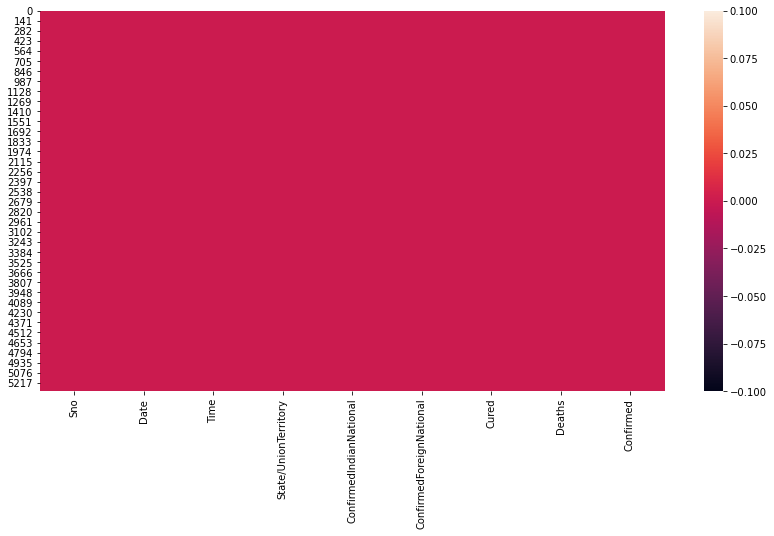

In [25]:
sns.heatmap(data.isnull());

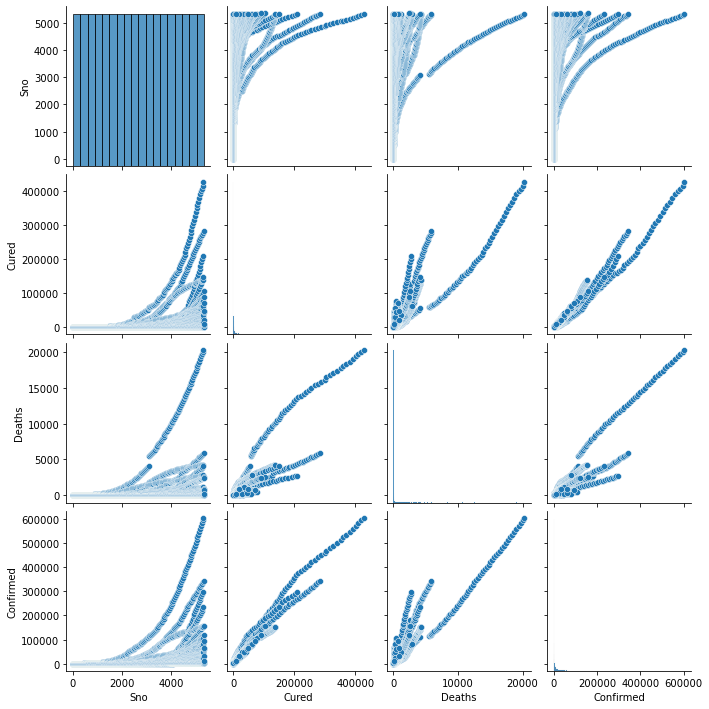

In [26]:
sns.pairplot(data = data);

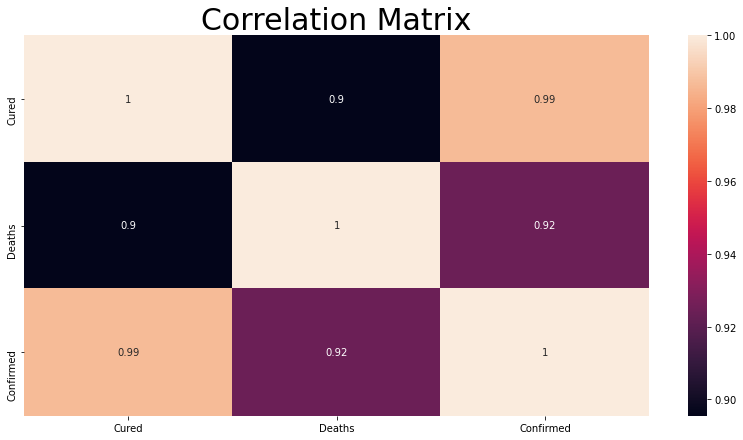

In [94]:
data.drop('Sno' , axis = 1, inplace = True)
sns.heatmap(data.corr(), annot=True)
plt.title('Correlation Matrix' , fontsize = 30)
plt.show()

In [95]:
final_data = data.groupby('Date').agg({'Confirmed':'sum','Deaths':'sum','Cured':'sum'})
final_data.tail()

,Confirmed,Deaths,Cured
Date,,,
08/14/20,2461190,48040,1751555
08/15/20,2526192,49036,1808936
08/16/20,2589682,49980,1862258
08/17/20,2647663,50921,1919842
08/18/20,2702742,51797,1977779


In [42]:
print('Total Number of Confirmed Cases =' ,final_data['Confirmed'].iloc[-1])

Total Number of Confirmed Cases = 2702742


In [44]:
print('Total Number of Deaths Cases =' ,final_data['Deaths'].iloc[-1])

Total Number of Deaths Cases = 51797


In [45]:
print('Total Number of Recovered Cases =' ,final_data['Cured'].iloc[-1])

Total Number of Recovered Cases = 1977779


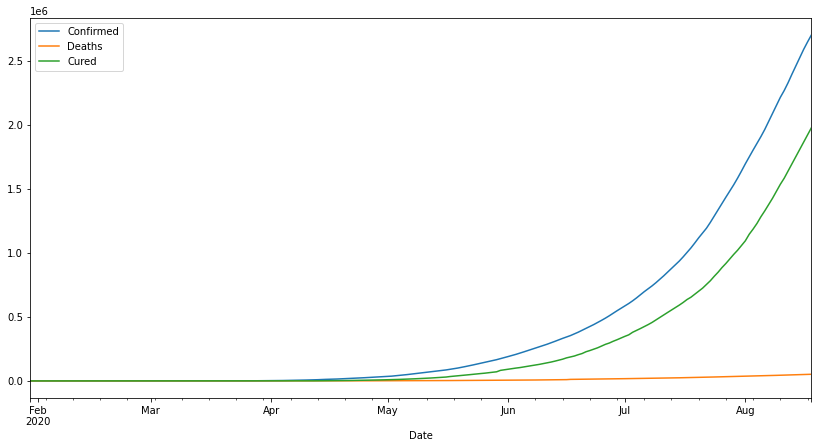

In [47]:
final_data.plot();

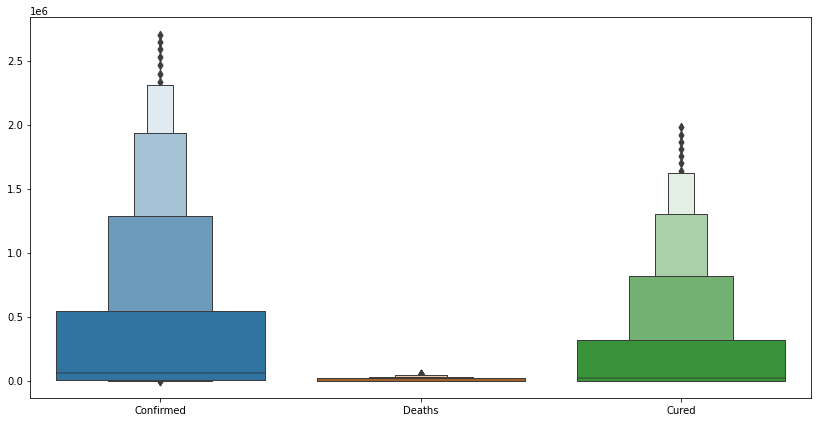

In [48]:
sns.boxenplot(data = final_data);

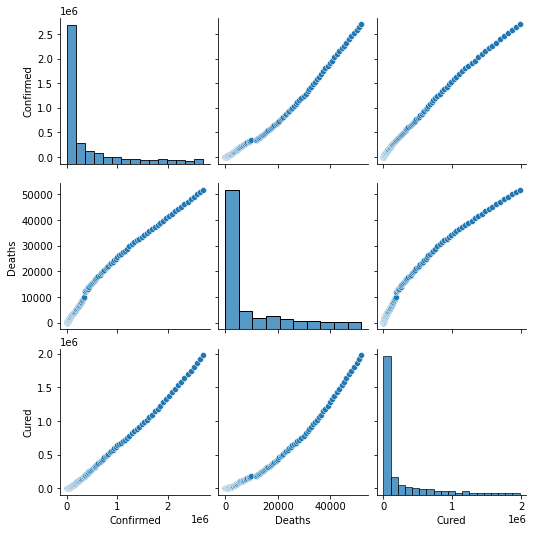

In [51]:
sns.pairplot(data = final_data);

Average increase in Number of Confirmed Cases Everyday: 13380.0
Average increase in Number of Recovered Cases Everyday: 9791.0
Average increase in Number of Deaths Cases Everyday: 256.0


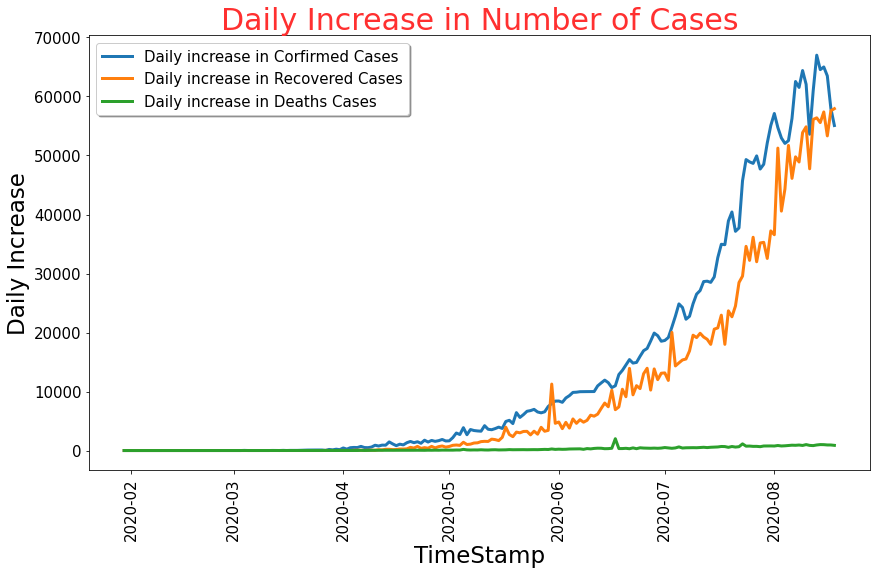

In [52]:
print("Average increase in Number of Confirmed Cases Everyday:" ,np.round(final_data['Confirmed'].diff().fillna(0).mean()))
print("Average increase in Number of Recovered Cases Everyday:" ,np.round(final_data['Cured'].diff().fillna(0).mean()))
print("Average increase in Number of Deaths Cases Everyday:" ,np.round(final_data['Deaths'].diff().fillna(0).mean()))

plt.figure(figsize=(14,8))
plt.plot(final_data['Confirmed'].diff().fillna(0),label= "Daily increase in Corfirmed Cases", linewidth = 3)
plt.plot(final_data['Cured'].diff().fillna(0),label= "Daily increase in Recovered Cases", linewidth = 3)
plt.plot(final_data['Deaths'].diff().fillna(0),label= "Daily increase in Deaths Cases", linewidth = 3)
plt.xlabel("TimeStamp",fontsize = 23)
plt.ylabel("Daily Increase",fontsize = 23)
plt.title("Daily Increase in Number of Cases",fontsize=30,color = "#FF3030")
plt.xticks(rotation=90)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.legend(prop = {'size' :15},frameon= True,fancybox = True,\
          shadow = True,framealpha = 1)
plt.show()

---

In [53]:
import datetime as dt
final_data['Day Since'] = final_data.index - final_data.index[0]
final_data['Day Since'] = final_data['Day Since'].dt.days
final_data.tail()

,Confirmed,Deaths,Cured,Day Since
Date,,,,
2020-08-14,2461190,48040,1751555,197
2020-08-15,2526192,49036,1808936,198
2020-08-16,2589682,49980,1862258,199
2020-08-17,2647663,50921,1919842,200
2020-08-18,2702742,51797,1977779,201


In [54]:
X = final_data.iloc[:,3].values.reshape(-1,1)
y = final_data.iloc[:,0].values.reshape(-1,1)

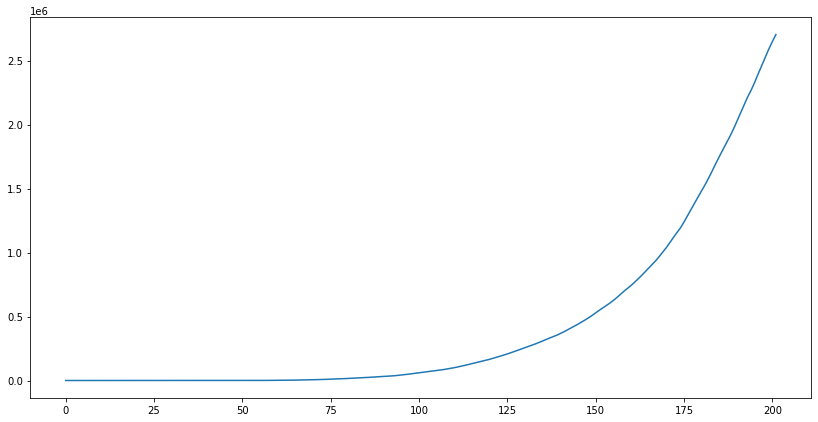

In [56]:
plt.plot(X,y);

---

**Let's Apply FBProphet Algorithm**

In [61]:
from fbprophet import Prophet

In [60]:
Confirmed_Cases = data.groupby('Date').sum()['Confirmed'].reset_index()

In [62]:
Confirmed_Cases.columns = ['ds','y']

In [63]:
Confirmed_Cases.info()

<class 'lux.core.frame.LuxDataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      202 non-null    datetime64[ns]
 1   y       202 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 3.3 KB


In [64]:
Confirmed_Cases.describe()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [65]:
Prophet_forecast = Prophet(interval_width = 0.98)
Prophet_forecast.fit(Confirmed_Cases)
future = Prophet_forecast.make_future_dataframe(periods = 60)
future.head()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
0,2020-01-30
1,2020-01-31
2,2020-02-01
3,2020-02-02
4,2020-02-03


In [67]:
forecast  =Prophet_forecast.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
257,2020-10-13,5.198160e+06,4.557627e+06,5.909991e+06
258,2020-10-14,5.240536e+06,4.525518e+06,5.961996e+06
259,2020-10-15,5.287909e+06,4.601766e+06,5.987856e+06
260,2020-10-16,5.335782e+06,4.663466e+06,6.082415e+06
261,2020-10-17,5.383876e+06,4.689709e+06,6.162609e+06


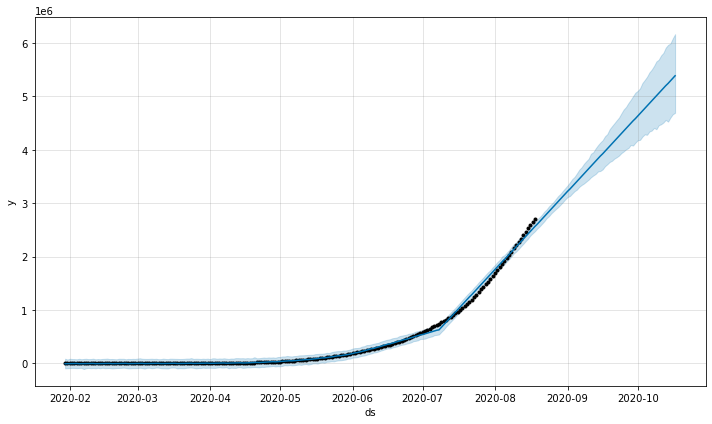

In [68]:
Prophet_forecast_plot = Prophet_forecast.plot(forecast)

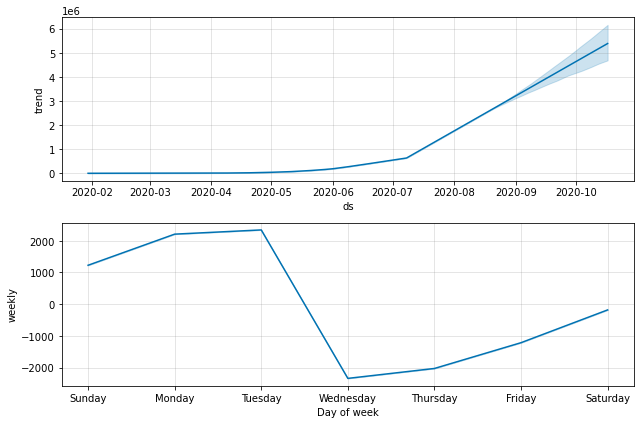

In [69]:
Prophet_forecast_components_plot = Prophet_forecast.plot_components(forecast)

In [70]:
Deaths_Cases = data.groupby('Date').sum()['Deaths'].reset_index()

In [71]:
Deaths_Cases.columns  = ['ds','y']
Deaths_Cases.tail()

,ds,y
197,2020-08-14,48040
198,2020-08-15,49036
199,2020-08-16,49980
200,2020-08-17,50921
201,2020-08-18,51797


In [72]:
Deaths_Cases.info()

<class 'lux.core.frame.LuxDataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      202 non-null    datetime64[ns]
 1   y       202 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 3.3 KB


In [73]:
Deaths_Cases.describe()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [74]:
from fbprophet import Prophet


In [75]:
Prophet_forecast  = Prophet(interval_width=0.98)
Prophet_forecast.fit(Deaths_Cases)
future = Prophet_forecast.make_future_dataframe(periods = 60)
future.head()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
0,2020-01-30
1,2020-01-31
2,2020-02-01
3,2020-02-02
4,2020-02-03


In [76]:
forecast = Prophet_forecast.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
257,2020-10-13,91563.377477,81424.745082,100771.398901
258,2020-10-14,92301.613843,81814.868849,101931.217913
259,2020-10-15,93054.623217,82367.693896,102618.146019
260,2020-10-16,93797.191143,82851.666294,103616.734828
261,2020-10-17,94546.643977,83788.418376,104840.215806


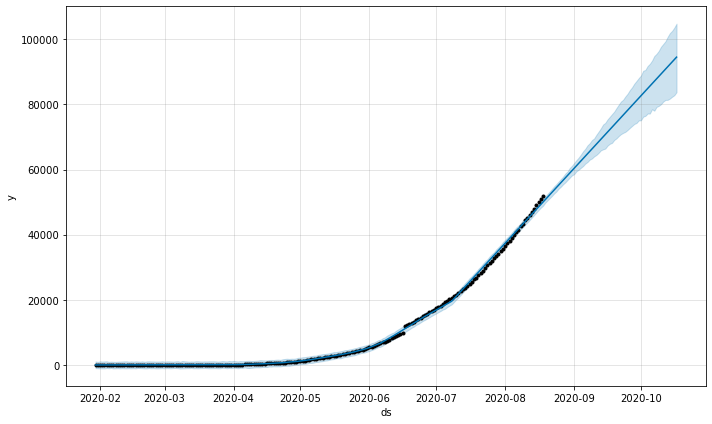

In [78]:
Prophet_forecast_plot=  Prophet_forecast.plot(forecast)

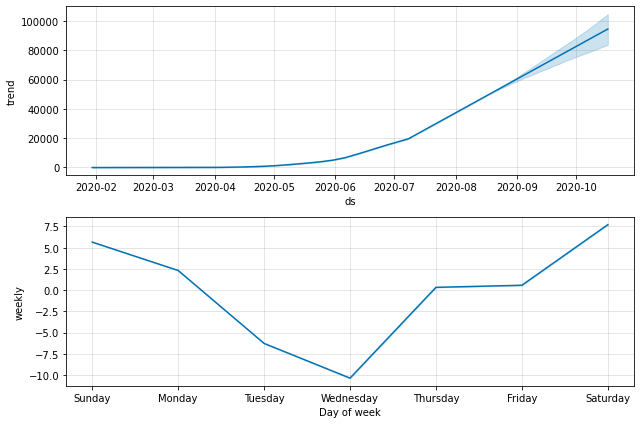

In [79]:
Prophet_forecast_components_plot = Prophet_forecast.plot_components(forecast)

In [80]:
Recovered_Cases = data.groupby('Date').sum()['Cured'].reset_index()


In [81]:
Recovered_Cases.columns = ['ds','y']
Recovered_Cases.tail()

,ds,y
197,2020-08-14,1751555
198,2020-08-15,1808936
199,2020-08-16,1862258
200,2020-08-17,1919842
201,2020-08-18,1977779


In [82]:
Recovered_Cases.info()

<class 'lux.core.frame.LuxDataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      202 non-null    datetime64[ns]
 1   y       202 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 3.3 KB


In [83]:
Recovered_Cases.describe()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [84]:
from fbprophet import Prophet


In [85]:
Prophet_forecast   = Prophet(interval_width=0.98)
Prophet_forecast.fit(Recovered_Cases)
future = Prophet_forecast.make_future_dataframe(periods = 60)
future.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
257,2020-10-13
258,2020-10-14
259,2020-10-15
260,2020-10-16
261,2020-10-17


In [86]:
forecast = Prophet_forecast.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
257,2020-10-13,3.731359e+06,3.288697e+06,4.205031e+06
258,2020-10-14,3.760398e+06,3.288176e+06,4.231223e+06
259,2020-10-15,3.795235e+06,3.325030e+06,4.260538e+06
260,2020-10-16,3.830984e+06,3.380405e+06,4.306076e+06
261,2020-10-17,3.866417e+06,3.382174e+06,4.374489e+06


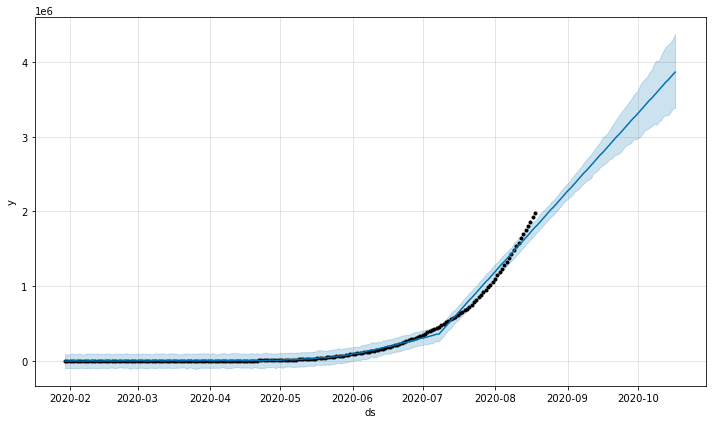

In [88]:
Prophet_forecast_plot  = Prophet_forecast.plot(forecast)

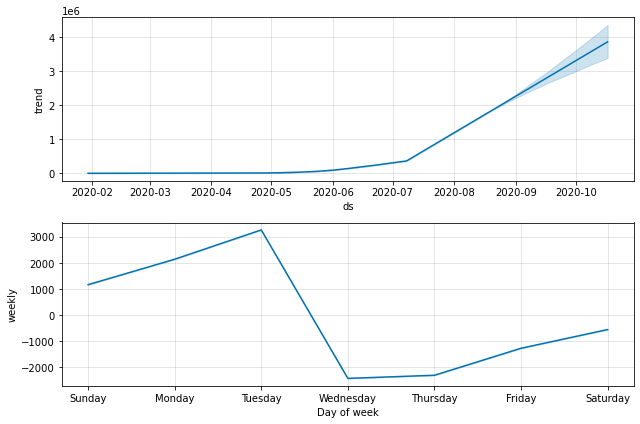

In [89]:
Prophet_forecast_components_plot  = Prophet_forecast.plot_components(forecast)

   --- 

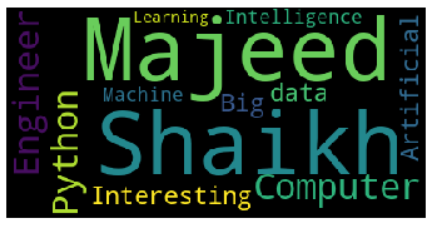

# $$Thankyou!!!$$

---